In [ ]:
import re
import pandas as pd

In [ ]:
data=pd.read_csv('/content/weblog.csv')

In [ ]:
data.head()

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16007 entries, 0 to 16006
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IP      16007 non-null  object
 1   Time    16007 non-null  object
 2   URL     16007 non-null  object
 3   Staus   16007 non-null  object
dtypes: object(4)
memory usage: 500.3+ KB


In [ ]:
data.shape

(16007, 4)

In [ ]:
data.Staus.value_counts()

200             11330
302              3498
304               658
404               251
No                167
206                52
2018]              28
2017]               7
dumped              5
Aborted             4
Assertion           4
found               2
Segmentation        1
Name: Staus, dtype: int64

In [ ]:
#flitering only codes

df = data[(data.Staus.isin(["200","302","304","404","206"]))]
df

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200
...,...,...,...,...
16002,10.130.2.1,[02/Mar/2018:15:47:12,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200
16003,10.130.2.1,[02/Mar/2018:15:47:23,GET /allsubmission.php HTTP/1.1,200
16004,10.130.2.1,[02/Mar/2018:15:47:32,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200
16005,10.130.2.1,[02/Mar/2018:15:47:35,GET /allsubmission.php HTTP/1.1,200


In [ ]:
df.shape

(15789, 4)

In [ ]:
pd.concat([df['Staus'].value_counts().rename('count'), 
        df['Staus'].value_counts(normalize=True).mul(100).rename('percentage')], axis=1)

,count,percentage
200,11330,71.758819
302,3498,22.154665
304,658,4.167458
404,251,1.589714
206,52,0.329343


In [ ]:
import sidetable

In [ ]:
df.stb.freq(['Staus'],style=True)

,Staus,count,percent,cumulative_count,cumulative_percent
0,200,"11,330",71.76%,"11,330",71.76%
1,302,"3,498",22.15%,"14,828",93.91%
2,304,658,4.17%,"15,486",98.08%
3,404,251,1.59%,"15,737",99.67%
4,206,52,0.33%,"15,789",100.00%


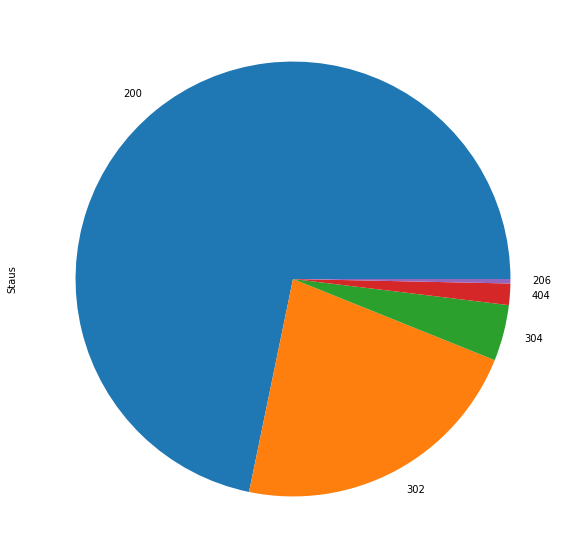

In [ ]:
df.Staus.value_counts().plot.pie(figsize=(10,10))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15789 entries, 0 to 16006
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IP      15789 non-null  object
 1   Time    15789 non-null  object
 2   URL     15789 non-null  object
 3   Staus   15789 non-null  object
dtypes: object(4)
memory usage: 616.8+ KB


In [ ]:
df.head()

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [ ]:
#replacing symbols
df.Time = df.Time.str.replace('[', '')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.head(2)

,IP,Time,URL,Staus
0,10.128.2.1,29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302


In [ ]:
from datetime import datetime

s = "29/Nov/2017:06:58:55"
f = "%d/%b/%Y:%H:%M:%S"
out = datetime.strptime(s, f)
print(out)

2017-11-29 06:58:55


In [ ]:
#converting into Timestamp format
df['Time'] = pd.to_datetime(df['Time'], format='%d/%b/%Y:%H:%M:%S')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15789 entries, 0 to 16006
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   IP      15789 non-null  object        
 1   Time    15789 non-null  datetime64[ns]
 2   URL     15789 non-null  object        
 3   Staus   15789 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 616.8+ KB


In [ ]:
df.head()

,IP,Time,URL,Staus
0,10.128.2.1,2017-11-29 06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,2017-11-29 06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,2017-11-29 06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,2017-11-29 06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,2017-11-29 06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [ ]:
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df['second'] = df['Time'].dt.second

In [ ]:
df

,IP,Time,URL,Staus,year,month,day,hour,minute,second
0,10.128.2.1,2017-11-29 06:58:55,GET /login.php HTTP/1.1,200,2017,11,29,6,58,55
1,10.128.2.1,2017-11-29 06:59:02,POST /process.php HTTP/1.1,302,2017,11,29,6,59,2
2,10.128.2.1,2017-11-29 06:59:03,GET /home.php HTTP/1.1,200,2017,11,29,6,59,3
3,10.131.2.1,2017-11-29 06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,2017,11,29,6,59,4
4,10.130.2.1,2017-11-29 06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,2017,11,29,6,59,6
...,...,...,...,...,...,...,...,...,...,...
16002,10.130.2.1,2018-03-02 15:47:12,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,2018,3,2,15,47,12
16003,10.130.2.1,2018-03-02 15:47:23,GET /allsubmission.php HTTP/1.1,200,2018,3,2,15,47,23
16004,10.130.2.1,2018-03-02 15:47:32,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,2018,3,2,15,47,32
16005,10.130.2.1,2018-03-02 15:47:35,GET /allsubmission.php HTTP/1.1,200,2018,3,2,15,47,35


In [ ]:
print(df.groupby(df.hour).max())

In [ ]:
print(df.groupby(df.hour).min())

In [ ]:
print(df.groupby(df.hour).mean())

In [ ]:
df.head()

,IP,Time,URL,Staus,year,month,day,hour,minute,second
0,10.128.2.1,2017-11-29 06:58:55,GET /login.php HTTP/1.1,200,2017,11,29,6,58,55
1,10.128.2.1,2017-11-29 06:59:02,POST /process.php HTTP/1.1,302,2017,11,29,6,59,2
2,10.128.2.1,2017-11-29 06:59:03,GET /home.php HTTP/1.1,200,2017,11,29,6,59,3
3,10.131.2.1,2017-11-29 06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,2017,11,29,6,59,4
4,10.130.2.1,2017-11-29 06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,2017,11,29,6,59,6


In [ ]:
#splitting URL part
df['Requests'], df['half url'] = df['URL'].str.split('/', 1).str

In [ ]:
df

,IP,Time,URL,Staus,year,month,day,hour,minute,second,Requests,half url
0,10.128.2.1,2017-11-29 06:58:55,GET /login.php HTTP/1.1,200,2017,11,29,6,58,55,GET,login.php HTTP/1.1
1,10.128.2.1,2017-11-29 06:59:02,POST /process.php HTTP/1.1,302,2017,11,29,6,59,2,POST,process.php HTTP/1.1
2,10.128.2.1,2017-11-29 06:59:03,GET /home.php HTTP/1.1,200,2017,11,29,6,59,3,GET,home.php HTTP/1.1
3,10.131.2.1,2017-11-29 06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,2017,11,29,6,59,4,GET,js/vendor/moment.min.js HTTP/1.1
4,10.130.2.1,2017-11-29 06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,2017,11,29,6,59,6,GET,bootstrap-3.3.7/js/bootstrap.js HTTP/1.1
...,...,...,...,...,...,...,...,...,...,...,...,...
16002,10.130.2.1,2018-03-02 15:47:12,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,2018,3,2,15,47,12,GET,showcode.php?id=309&nm=ham05 HTTP/1.1
16003,10.130.2.1,2018-03-02 15:47:23,GET /allsubmission.php HTTP/1.1,200,2018,3,2,15,47,23,GET,allsubmission.php HTTP/1.1
16004,10.130.2.1,2018-03-02 15:47:32,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,2018,3,2,15,47,32,GET,showcode.php?id=309&nm=ham05 HTTP/1.1
16005,10.130.2.1,2018-03-02 15:47:35,GET /allsubmission.php HTTP/1.1,200,2018,3,2,15,47,35,GET,allsubmission.php HTTP/1.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15789 entries, 0 to 16006
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   IP        15789 non-null  object        
 1   Time      15789 non-null  datetime64[ns]
 2   URL       15789 non-null  object        
 3   Staus     15789 non-null  object        
 4   year      15789 non-null  int64         
 5   month     15789 non-null  int64         
 6   day       15789 non-null  int64         
 7   hour      15789 non-null  int64         
 8   minute    15789 non-null  int64         
 9   second    15789 non-null  int64         
 10  Requests  15789 non-null  object        
 11  half url  15789 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 1.6+ MB


In [ ]:
#max request per hours
(df.groupby(["Requests"]).agg({'hour': ['max']}).stb.subtotal())

,hour
,max
Requests,
GET,23
HEAD,20
POST,23
grand_total,66


Max **66** request in an **hour**

In [ ]:
##min request per hours

df.groupby(["Requests"]).agg({'hour': ['min']}).stb.subtotal()

,hour
,min
Requests,
GET,0
HEAD,20
POST,0
grand_total,20


Min **20** request in an **hour**

In [ ]:
#average request per hours

df.groupby(["Requests"]).agg({'hour': ['mean']}).stb.subtotal()

,hour
,mean
Requests,
GET,15.823155
HEAD,20.000000
POST,14.873900
grand_total,50.697056


Average **50** request in an **hour**